# Project 3 
## EDA

**Project Partner**: Star Li, Setfan Li

## Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

- Loading all the provided Data Frames

In [2]:
data_state = pd.read_csv('4.18states.csv')

In [3]:
data_counties = pd.read_csv('abridged_couties.csv')

In [4]:
data_time_conf = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [5]:
data_time_de = pd.read_csv('time_series_covid19_deaths_US.csv')

## Data Filtering (we only want U.S. data)

- Based on our fist look at the data as well as the objective of our project, we decided to work with only the U.S. data since we have the most specific data regarding all the cases in the U.S. 

In [6]:
data_state = data_state.loc[data_state['Country_Region'] == 'US']

In [7]:
data_state = data_state.rename(columns={"Long_": "Long"})

In [8]:
data_state.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


## Data Cleaning

### 1. "4.18state"

- We fist divide the data into edge case (placeselike Diamond Princess that does not have lat and long) and general case

In [9]:
edge_case = data_state[data_state['Lat'].isnull()]

In [10]:
edge_case.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.0,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-04-18 22:32:47,NaN,NaN,103,0,0.0,103.0,99999.0,NaN,NaN,NaN,0.0,84099999,USA,NaN,NaN
116,Recovered,US,NaN,NaN,NaN,0,0,64840.0,-64840.0,NaN,NaN,NaN,NaN,NaN,84070001,USA,NaN,NaN


- Notice that there are only three cases in the edge_case category, and those are very specially cases such as "Diamond Princess" and "Grand Princess", and the are clearly not a good representation of regional cases. So, we can safely drop these columns from our main focuse

In [11]:
general_state = data_state[data_state['Lat'].notnull()]

#### Cleaning up NaN values

In [12]:
general_state[general_state['Recovered'].isnull()].head(5)

,Province_State,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
5,California,US,2020-04-18 22:32:47,36.1162,-119.6816,30491,1140,NaN,29351.0,6.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079
6,Colorado,US,2020-04-18 22:32:47,39.0598,-105.3111,9047,389,NaN,8658.0,8.0,159.648818,43307.0,1755.0,4.299768,84000008,USA,764.221442,19.398696
7,Connecticut,US,2020-04-18 22:32:47,41.5978,-72.7554,17550,1086,NaN,16464.0,9.0,492.246487,55462.0,1946.0,6.188034,84000009,USA,1555.611091,11.088319


- Notice that there are some NaN's columns such as "Recovered", "Active", "Mortality_rate", and "Hospitalization_Rate"
- We know that, based on the provided README file, Active cases = total confirmed - total recovered - total deaths, we can safely fill out all the NaN's in Deaths, Recorvered, and Active with 0, since they are all mutually exclusive.

In [13]:
general_state[['Recovered']] = general_state[['Recovered']].fillna(0)

/srv/conda/envs/data100/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
general_state[['Active']] = general_state[['Active']].fillna(0)

In [15]:
general_state[['Mortality_Rate']] = general_state[['Mortality_Rate']].fillna(0)

- Notice that US Hospitalization Rate (%): = Total number hospitalized / Number confirmed cases, so if the number of People_Hospitalized is NaN or 0, we can logically fill in 0 for all the NaN's in these two columns

In [16]:
general_state[['People_Hospitalized']] = general_state[['People_Hospitalized']].fillna(0)

In [17]:
general_state[['Hospitalization_Rate']] = general_state[['Hospitalization_Rate']].fillna(0)

In [18]:
general_state.isna().sum()

Province_State          0
Country_Region          0
Last_Update             1
Lat                     0
Long                    0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

- Up to this point, we see that there is only one NaN value left in the column of Last_Update

In [19]:
general_state[general_state['Last_Update'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,NaN,-14.271,-170.132,0,0,0.0,0.0,60.0,0.0,3.0,0.0,0.0,16,ASM,5.391708,0.0


- Since "American Samoa" has such a small number of cases, it will have relatively small effect on our prediction, so we decided to remove this area to keep the consistency of our dataframe.

In [20]:
general_state = general_state[general_state['Last_Update'].notnull()]

#### End of Data Cleaning for "4.18state"

### 2. Join "abridged_couties" with "time_series_covid19_confirmed_US"

- abridged_counties contains wonderful information about population health condition as well as population demograpics, and time_series_covid19_confirmed_US has a wonderful pattern of the times series of confirms in the U.S., so it would be a lot easier to select feature from this join table rather than subseting data separately from each data set when selecting features.
- Notice that we are not cleaning up the data for the death timeserise, as our main objective is to predict the confirmed cases of the next day.

In [21]:
data_time_conf.head(6)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,45,50,51,51,51,51,51,51,51,53
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15,17,19,19,19,23,24,26,26,25


- We first filtered out the territories of the U.S. as we think it is not the best representation of the cases of all the other 50 major U.S. States

In [22]:
data_time_conf = data_time_conf.iloc[5:, :]

In [23]:
data_time_conf.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15,17,19,19,19,23,24,26,26,25
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56,59,66,71,72,87,91,101,103,109
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,4,9,9,10,10,11,12,14,15,18
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,9,11,13,16,17,17,18,22,24,26
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,11,12,12,13,14,16,17,18,20,20


In [24]:
data_counties = data_counties.iloc[:-2, :]

- There are two rows with all NaN's at the end, we the code above dropped them.

In [25]:
data_counties.head(5)

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


- We decided to use "UID" of data_time_conf and "countyFISP" from data_counties as our foreign key, and notice that the "countyFIPS" of data_counties is just UID of data_time_conf add 84000000
- So in the following codes, we adjust the keys such that they will match with each other

In [26]:
data_time_conf['UID'] = data_time_conf['UID'].astype(int)

In [27]:
data_counties["countyFIPS"] = data_counties['countyFIPS'].astype(int)

In [28]:
data_counties['countyFIPS'] = data_counties['countyFIPS'] + 84000000

- Merge the two table

In [29]:
combined_conf = data_time_conf.merge(data_counties, left_on= 'UID', right_on = 'countyFIPS')

In [30]:
combined_conf.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


#### Cleaning up NaN values

In [31]:
combined_conf.isna().sum()

UID                      0
iso2                     0
iso3                     0
code3                    0
FIPS                     0
                      ... 
foreign travel ban       0
SVIPercentile            1
HPSAShortage          1101
HPSAServedPop         1101
HPSAUnderservedPop    1101
Length: 186, dtype: int64

- Notice that there are lots of NaN values in some of the columns. 
- Here, in order to give a consistant and relatively accurate X matrix for fitting our models, we decided to drop out the columns with too many NaNs, since if there are too many NaNs in a category, it would be really hard to choose alternative for them since demographic information are very unique to each state, and filling up all the NaN data with "mean" "median" or "most frequent" will potentially bring misleading information to our models.
- To define "too many", we decided that if more than 20% of the data are NaN, we will drop it.

In [32]:
combined_conf.loc[:, combined_conf.isnull().mean() > .2].isnull().mean()

3-YrDiabetes2015-17                  0.547452
3-YrMortalityAge<1Year2015-17        0.850955
3-YrMortalityAge1-4Years2015-17      0.979299
3-YrMortalityAge5-14Years2015-17     0.969745
3-YrMortalityAge15-24Years2015-17    0.800637
3-YrMortalityAge25-34Years2015-17    0.695223
3-YrMortalityAge35-44Years2015-17    0.586624
3-YrMortalityAge45-54Years2015-17    0.328981
mortality2015-17Estimated            0.969745
HPSAShortage                         0.350637
HPSAServedPop                        0.350637
HPSAUnderservedPop                   0.350637
dtype: float64

- The columns above are the ones we drop from the dataframe, as they have very high porportion of NaN's.
- Thus, the code below drop all the columns above

In [33]:
combined_conf = combined_conf.loc[:, combined_conf.isnull().mean() <= .2]

In [34]:
combined_conf.loc[:, combined_conf.isnull().mean() > 0].isnull().mean()

State                                0.021019
lat                                  0.021019
lon                                  0.021019
#EligibleforMedicare2018             0.001911
MedicareEnrollment,AgedTot2017       0.006688
HeartDiseaseMortality                0.002229
StrokeMortality                      0.002548
dem_to_rep_ratio                     0.008280
3-YrMortalityAge55-64Years2015-17    0.148089
3-YrMortalityAge65-74Years2015-17    0.097452
3-YrMortalityAge75-84Years2015-17    0.068153
3-YrMortalityAge85+Years2015-17      0.050000
stay at home                         0.155732
>50 gatherings                       0.037580
>500 gatherings                      0.037580
entertainment/gym                    0.020701
SVIPercentile                        0.000318
dtype: float64

Columns to Drop Direactly:
1. `State`: The Province_State from the time serise table has no NaN values, so Provinc_State can already represent the names of all the State.
2. `lat`: The Lat from the time serise table has no NaN values, so it can present all the locations
3. `lon`: The Lon from the time serise table has no NaN values, so it can present all the locations
4. `entertainment/gym`: We think gym and entertainment might have long-term effect for human body, but it is not very related to the virus that is happend right now.

Columns to take the "Mean" value to fill NaNs:
1. `#EligibleforMedicare2018`: Since it has such a small NaN percentage and Medicare system is relatively well-developed in the U.S., we decided to fill the mean for the NaN of this column
2. `All the rate, ratio, and percentile`: Since rate and ratio has already scaled, we can safely apply rate and ratio to states and counties with different populations.
3. `All the MortalityAge`: Since all of them have such low NaN precentage, we decided to fill in Mean for them, as Mean will average out the effect of states with large population and small population. 

Columns to take the "0" value to fill NaNs:
1. `>50 gatherings`: since gatherings might have a huge impact on confirmed cases, we rather to do it more safely by filling in 0s for these features with NaNs.
2. `>500 gatherings`: since gatherings might have a huge impact on confirmed cases, we rather to do it more safely by filling in 0s for these features with NaNs.

In [35]:
combined_conf = combined_conf.drop(columns = ['State', 'lat', 'lon', 'entertainment/gym'])

In [36]:
combined_conf['>50 gatherings'] = combined_conf['>50 gatherings'].fillna(0)

In [37]:
combined_conf['>500 gatherings'] = combined_conf['>500 gatherings'].fillna(0)

In [38]:
combined_conf = combined_conf.fillna(combined_conf.mean())

In [39]:
combined_conf.loc[:, combined_conf.isnull().mean() > 0].isnull().mean().sum()

0.0

- There are no more NaN left in our dataframe!

#### End of Join "abridged_couties" with "time_series_covid19_confirmed_US"

### 3. Combine the above two df together to create a raw feature dataframe

In [40]:
all_in_1 = combined_conf.merge(general_state, left_on = 'Province_State', right_on='Province_State')

In [41]:
all_in_1.head(5)

,UID_x,iso2,iso3,code3,FIPS_x,Admin2,Province_State,Country_Region_x,Lat_x,Long_,...,Active,FIPS_y,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID_y,ISO3,Testing_Rate,Hospitalization_Rate
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895


- Notice there are many columns within these two dataframe with repeated names, which Pandas matigate through it with adding "_x" "_y" at the end of the column names
- So, I clean out the data further by dropping the columns with overlapping names

In [42]:
drop_list = ['UID_x', 'iso2', 'iso3', "code3", "FIPS_x", 'Admin2', 
                'Province_State', "Country_Region_x", "Combined_Key",
               "StateName", 'countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 
                'POP_LATITUDE', 'POP_LONGITUDE', 'FIPS_y', "UID_y", 
                "ISO3", 'CensusRegionName', 'Country_Region_y', 'Last_Update', 'CensusDivisionName']

In [43]:
all_in_1 = all_in_1.drop(columns = drop_list)

## EDA (Heatmap)

- Features from Star's Lasso Feature selection method

In [125]:
lasso_features = ['dem_to_rep_ratio', 'PopulationDensityperSqMile2010', 'PopFmle25-292010', '4/18/20']

- Features from ExtraTreesClassifier

In [182]:
extra_t_features = ['PopulationEstimate2018', 'stay at home', 
                    'Mortality_Rate', 'Testing_Rate', 'People_Hospitalized', 
                    'Incident_Rate', 'People_Tested', 'StrokeMortality','PopFmle65-742010',
                    'PopMale75-842010', 'PopFmle75-842010', 
                    'PopFmle45-542010','PopMale55-592010', 'PopFmle55-592010', 'PopMale60-642010',
                    'PopFmle60-642010',
                    'PopMale75-842010', 'PopFmle75-842010',
                    '3-YrMortalityAge55-64Years2015-17',
                    '3-YrMortalityAge65-74Years2015-17',
                    '3-YrMortalityAge75-84Years2015-17', '3-YrMortalityAge85+Years2015-17',]

In [183]:
heat_features = lasso_features + extra_t_features

In [184]:
heat_features

['dem_to_rep_ratio',
 'PopulationDensityperSqMile2010',
 'PopFmle25-292010',
 '4/18/20',
 'PopulationEstimate2018',
 'stay at home',
 'Mortality_Rate',
 'Testing_Rate',
 'People_Hospitalized',
 'Incident_Rate',
 'People_Tested',
 'StrokeMortality',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale75-842010',
 'PopFmle75-842010',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17']

In [185]:
heat_df = all_in_1[heat_features]

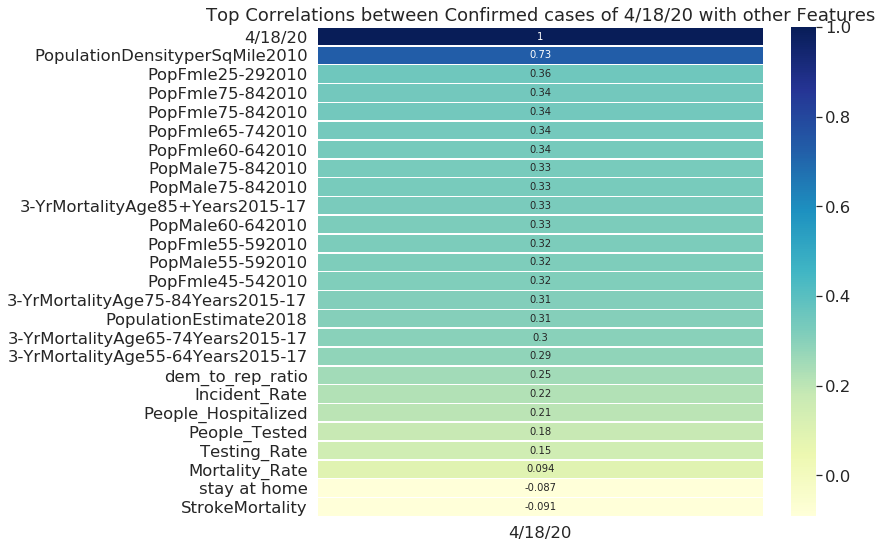

In [190]:
plt.figure(figsize=(10, 9))
plot = sns.heatmap(heat_df.corr()[['4/18/20']].sort_values(by=['4/18/20'],ascending=False),
            cmap="YlGnBu", linewidths=.5, annot=True, annot_kws={"size": 10})
plot.set_title('Top Correlations between Confirmed cases of 4/18/20 with other Features');

# ignore the following part

### 4. Train test split

In [49]:
y = all_in_1['4/18/20']

In [50]:
X = all_in_1.drop(columns = ['4/18/20'])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 5. Use SKlearn Feature Selection package to create a df filter

In [52]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
X_train = imp.fit_transform(X_train)

In [53]:
filled_df = pd.DataFrame(X_train,
                   columns=all_in_1.drop(columns = ['4/18/20']).columns)

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(filled_df, y_train)
feature_filter = SelectFromModel(clf, prefit=True)
X_train = feature_filter.transform(X_train)

### 6. Decision Tree Regression Model fitting

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_1.fit(X_train, y_train);

In [56]:
training_accuracy = regr_1.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9999999994985884


In [57]:
y_train

2772     4
1952    53
321     48
1072     6
680      4
        ..
3092     7
1095    12
1130    90
1294     5
860      3
Name: 4/18/20, Length: 2826, dtype: int64

In [58]:
regr_1.predict(X_train)

array([ 4., 53., 48., ..., 90.,  5.,  3.])

In [59]:
def mse(y_train, y_true):
    return np.mean((y_train - y_true) ** 2)

In [60]:
mse(y_train, regr_1.predict(X_train))

0.003987861631173733

### 7. Test Accuracy

In [64]:
X_test = imp.fit_transform(X_test)

In [65]:
X_test = feature_filter.transform(X_test)

In [66]:
training_accuracy = regr_1.score(X_test, y_test)
print("Test Accuracy: ", training_accuracy)

Test Accuracy:  0.9867649764773749


### 7. The selected features by SKLearn

In [67]:
filled_df

,Lat_x,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,33.176597,-98.687909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18704.0,476.0,4806.0,18228.0,81.376364,176239.0,1321.0,2.544910,766.771225,7.062660
1,35.965756,-77.984225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6328.0,187.0,0.0,6141.0,63.803990,76211.0,388.0,2.955120,768.420655,6.131479
2,30.265487,-85.621226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25492.0,748.0,0.0,24744.0,120.060628,246527.0,3842.0,2.934254,1161.077449,15.071395
3,38.594719,-83.821510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2707.0,144.0,979.0,2563.0,79.075676,30596.0,1008.0,5.319542,893.756702,37.236793
4,39.391335,-88.806111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29160.0,1259.0,0.0,27901.0,248.473604,137404.0,4340.0,4.317558,1170.825347,14.883402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,44.718503,-92.422442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4199.0,212.0,0.0,3987.0,81.146824,48161.0,1176.0,5.048821,930.724499,28.006668
2822,36.993084,-85.060701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2707.0,144.0,979.0,2563.0,79.075676,30596.0,1008.0,5.319542,893.756702,37.236793
2823,30.844254,-91.049767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23580.0,1267.0,0.0,22313.0,512.913545,137999.0,1761.0,5.373198,3001.762352,7.468193
2824,44.334810,-84.127252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30791.0,2308.0,3237.0,28483.0,386.469173,99727.0,3634.0,7.495697,1251.710281,11.802150


In [68]:
subset = feature_filter.get_support()

In [69]:
filled_df = filled_df.loc[:, subset]

In [70]:
filled_df.columns

Index(['Lat_x', 'Long_', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20', '4/17/20',
       'Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', 'DiabetesPercentage',
       'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
       'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#Hospitals', '#ICU_beds',
       'dem_to_rep_ratio', 'PopMale<52010', 'PopFmle<52010', 'PopMale5-92010',
       'PopFmle5-92010', 'PopMale10-142010', 'PopFmle10-142010',
       'PopMale15-192010', 'PopFmle15-